<a href="https://colab.research.google.com/github/paninishah/synapse-learning-phase/blob/week2/Panini_Synapse_LP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

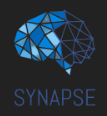

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

https://www.geeksforgeeks.org/ml-classification-vs-regression/
(Short and Sweet)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [2]:
!pip install shap -q  #Will be used later on

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regression

For regression we will use insurance dataset, which contains medical costs incurred
https://drive.google.com/file/d/1ld8fGZYBi5ytg8b1CcZJvPaXfhVzIhoZ/view?usp=sharing

## Basic EDA

### Import dataset

In [5]:
df=pd.read_csv('/content/drive/MyDrive/synapse/task2/insurance.csv')

### Use the very first steps involved in EDA -> info, head and describe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Now, plot a histogram to understand insurance charges *distribution*

<Axes: xlabel='charges', ylabel='Count'>

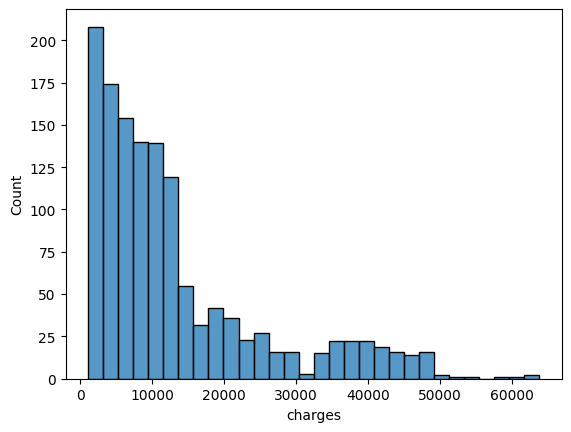

In [10]:
sb.histplot(df['charges'])

<Axes: xlabel='charges', ylabel='Density'>

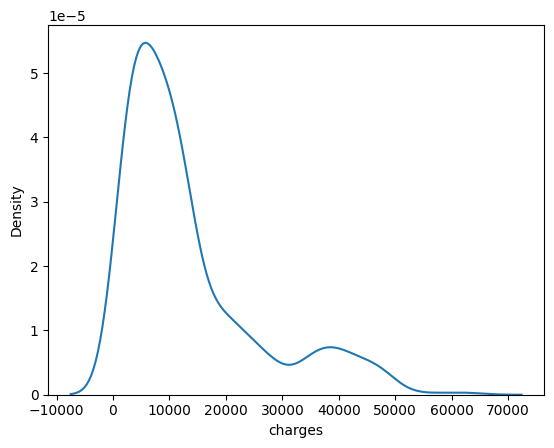

In [11]:
sb.kdeplot(df['charges']) #right tailed

In [12]:
df['charges'].skew()

np.float64(1.5158796580240388)

### Plot a scatter plot between age and insurance charges

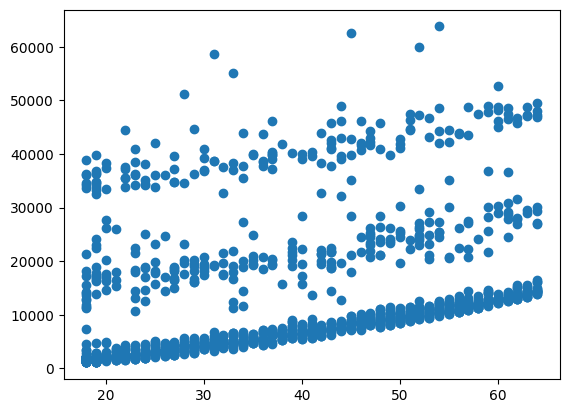

In [13]:
plt.scatter(x=df['age'],y=df['charges'])# should i use this or sb?

### Similarly, plot scatterplots for no. of children and charges, and also for bmi and charges


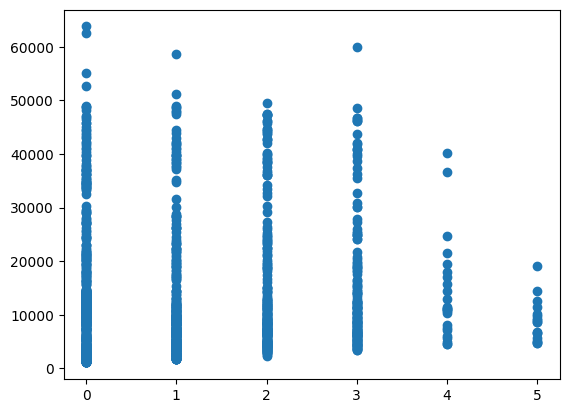

In [14]:
plt.scatter(x= df['children'],y= df['charges'])

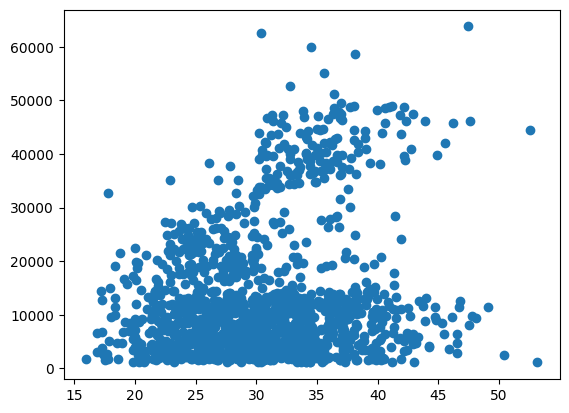

In [15]:
plt.scatter(x= df['bmi'],y=df['charges'])

### Now, use boxplots to find correlation between Sex and Charges, between Smoker and charges, and also between region and charges

<Axes: xlabel='sex', ylabel='charges'>

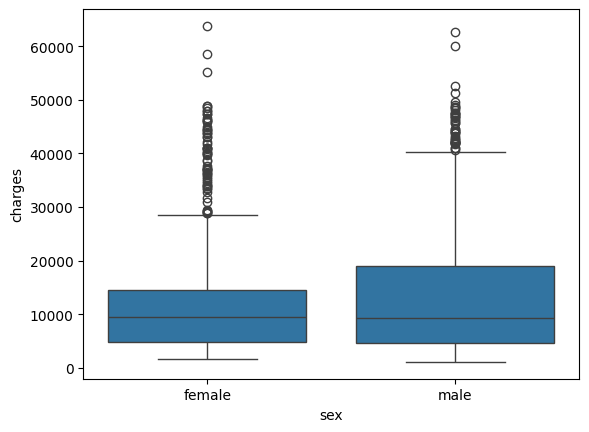

In [16]:
sb.boxplot(y=df['charges'], x=df['sex'])


<Axes: xlabel='smoker', ylabel='charges'>

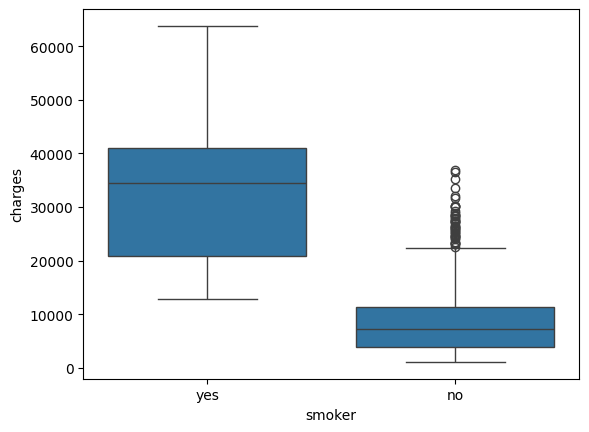

In [17]:
sb.boxplot(y=df['charges'], x=df['smoker'])

<Axes: xlabel='region', ylabel='charges'>

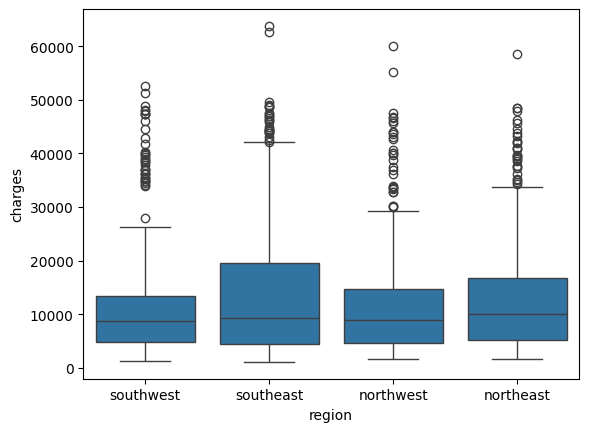

In [18]:
sb.boxplot(y=df['charges'], x=df['region'])

##### Now, make a heatmap to understand correlation between all attributes

<Axes: xlabel='smoker', ylabel='sex'>

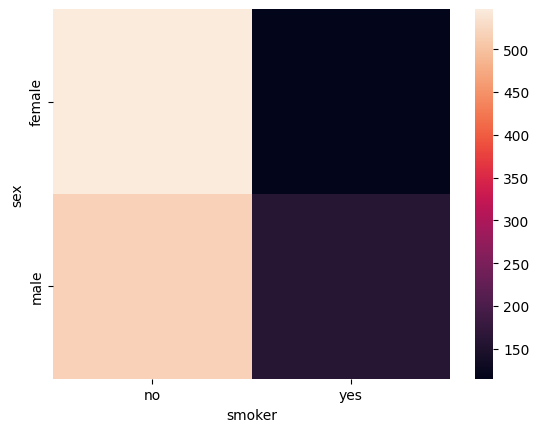

In [19]:
sb.heatmap(pd.crosstab(df['sex'],df['smoker']))

<Axes: xlabel='region', ylabel='sex'>

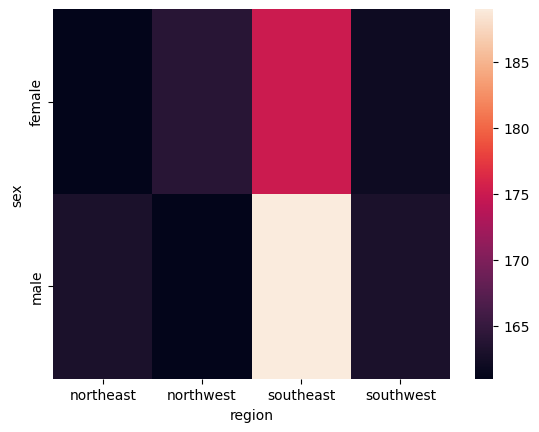

In [20]:
sb.heatmap(pd.crosstab(df['sex'],df['region']))

<Axes: xlabel='region', ylabel='smoker'>

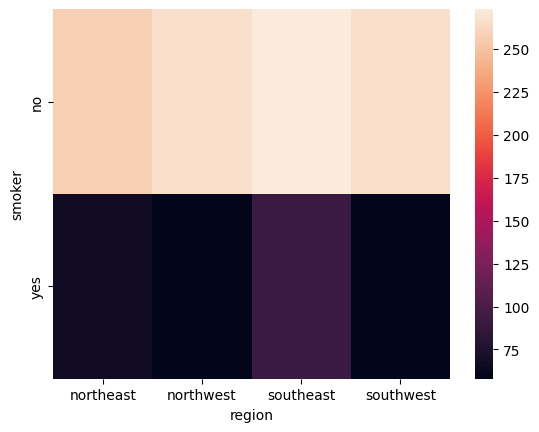

In [21]:
sb.heatmap(pd.crosstab(df['smoker'],df['region']))

*like this??*

## Question: What do you infer from the above analysis🤔

### Answer here:

*firstly, the distribution of charges is positively skewed. charges increase positively with age. females and males both have about the same median charge, but men have a higher maximum value of charges. smokers on an average have higher charges than non-smokers, and maximum charges are higher in the south- and north-east regions.*

### Now let's prep our data to perform Regression to predict the Incurred Charges

### Again do df.info() see how the datatype is

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### As you can see, sex, region and smoker attributes are of the object data type.
### So, convert them into numerical labels, using Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

Do df.head() to see how your dataframe looks like after LabelEncoding

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Question: What does label encoder do? 🤔

*it converts categorical data to numerical values, by assigning unique numbers, so it's easier to process*

### Now that you already know about standardization and normalization (I hope🙃), implement normalization here here:


##### Import MinMaxScaler from sklearn and normalize the coloums - ['age','bmi', 'children', 'charges']



### Answer:

In [26]:
from sklearn.preprocessing import MinMaxScaler
df[['age','bmi','children','charges']] = MinMaxScaler().fit_transform(df[['age','bmi','children','charges']])

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816


## Question: Why standardization is not needed here? 🤔

### Answer:

*cause features are already on a similar scale?*

As we are going to predict Insurance Charges, let us make two sections: one containing only the 'charges', and the other containing all values except for 'charges'

In [28]:
X= df.drop('charges',axis=1)
y= df['charges']

### Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

### Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [29]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [30]:
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0.0,1,3
1,0.000000,1,0.479150,0.2,0,2
2,0.217391,1,0.458434,0.6,0,2
3,0.326087,1,0.181464,0.0,0,1
4,0.304348,1,0.347592,0.0,0,1


In [31]:
print(X.shape)

(1338, 6)


In [32]:
y.head() #real values, so this is a regression problem

,charges
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


In [33]:
print(y.shape)

(1338,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


### The data is now split into 2 datasets of size 70% and 30% of original dataset. Surprised? 😮

### We have preprocessed our DataFrame now we'll perform Regression on this Data

### First lets understand Linear Regression, watch this video carefully it will be helpfull later on :)

https://www.youtube.com/watch?v=7ArmBVF2dCs

### A quick article
https://www.analyticsvidhya.com/blog/2021/08/understanding-linear-regression-with-mathematical-insights/

In [36]:
#train a model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [37]:
# fit the model on the training data, hint: use the fit method
regressor.fit(X_train,y_train)

LinearRegression()

#### The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

#### Use regressor.predict() on X_test and store it in a variable called "y_pred". Print type and size of the y_pred.

#### Size should be 402 if everything is correct. Yeh line confirm karna hai

In [38]:
# make predictions on the test data
y_pred = regressor.predict(X_test)

In [39]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.009374703390640669

### Visualize the predictions, plot a scatter plot of y_test vs y_pred and also plot the best fit line

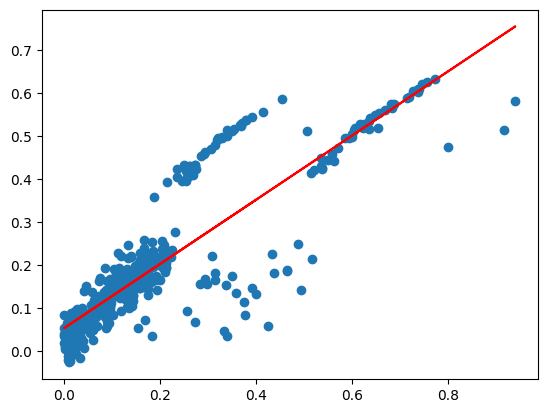

In [40]:
plt.scatter(y_test,y_pred)
m, b = np.polyfit(y_test, y_pred, 1) #best fit line using numpy; m = slope and b = intercept
plt.plot(y_test, m*y_test + b, color='red')
plt.show()

# Now let's start the fun part 😃

### Have you ever wondered what happens when you call **'regressor.fit(X_train, y_train)'** ?

### To understand what's hapenning in .fit method we will be implementing Linear Regression from scratch.

In [41]:
class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :
        # initialize the learning rate and iterations provides by the user
        self.learning_rate = learning_rate

        self.iterations = iterations

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # what does self.m and self.n represent and why are they calculated

        # self.m represents the no. of rows (samples) in training data, while self.n shows number of features in the training data
        # they are calculated because the gradient descent function needs them to compute loss and gradients correctly
        # weight initialization
        self.W = np.zeros( self.n ) #make a vector of n zeros, to fill weights in later

        self.b = 0# set this equal to 0

        self.X = X  # set this equal to X

        self.Y = Y# set this equal to Y

        # gradient descent learning
        for i in range(self.iterations) : # complete the range function

            self.update_weights()

        return self


    # Helper function to update weights in gradient descent
    def update_weights(self) :

        Y_pred = self.X.dot(self.W) + self.b

        # calculate gradients
        dW = (-2/self.m) * self.X.T.dot(self.Y-Y_pred) # dL/dW -> L = MSE = (y -ypred)^2/m
        db = (-2/self.m) * np.sum(self.Y-Y_pred)

        # write the code to update the weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self


    def predict(self,X) :

        return X.dot(self.W) + self.b


In [42]:
model = LinearRegression( iterations = 10000, learning_rate = 0.0015 )

model.fit(X_train, y_train)


## Question: What is this function actually doing? 🤔
#### Answer Here
<br>

### Now predict the output for the test data

In [43]:
Y_pred = model.predict(X_test)

### Calculate the mean squared error


In [44]:
mean_squared_error(y_test, Y_pred) #slightly greater than the inbuilt function

0.009843762338992833

### Plot a similar scatter plot as above


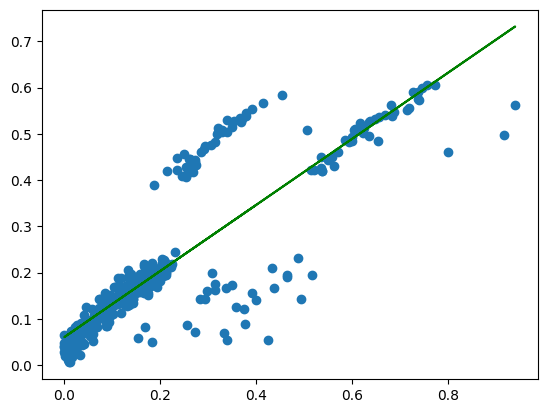

In [45]:
plt.scatter(y_test,Y_pred)
m, b = np.polyfit(y_test, Y_pred, 1)
plt.plot(y_test, m*y_test + b, color='green') #bit different than before
plt.show()

# Classification

#### In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [46]:
df = pd.read_csv('/content/drive/MyDrive/synapse/task2/classified_data.txt', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

## Basic EDA

### In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [48]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Draw boxplots for all the features for '0' and 'TARGET CLASS'

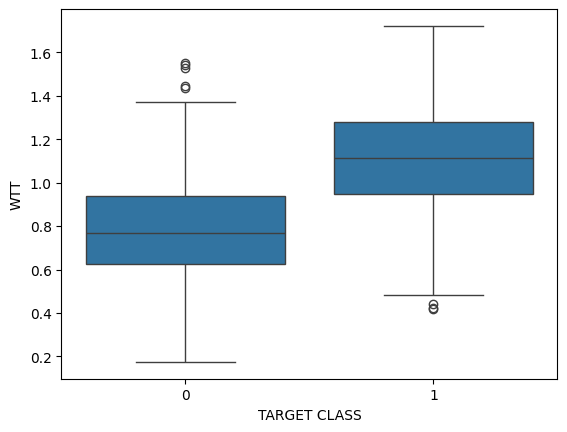

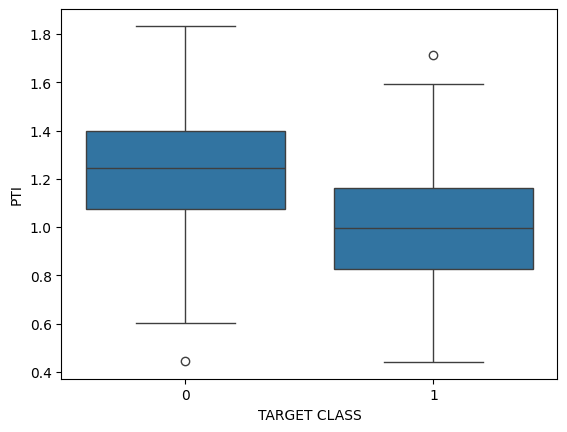

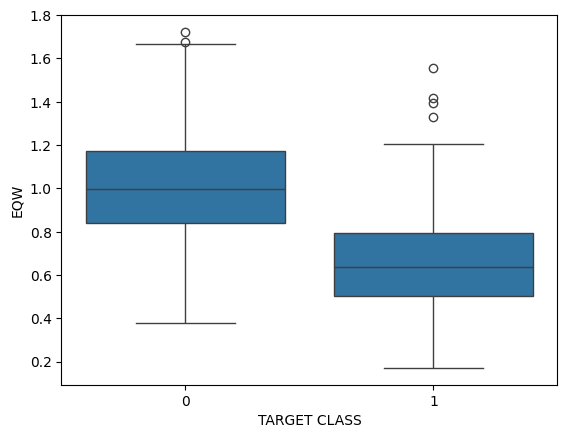

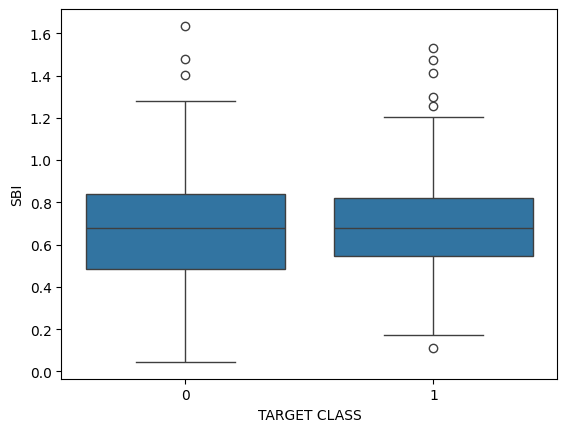

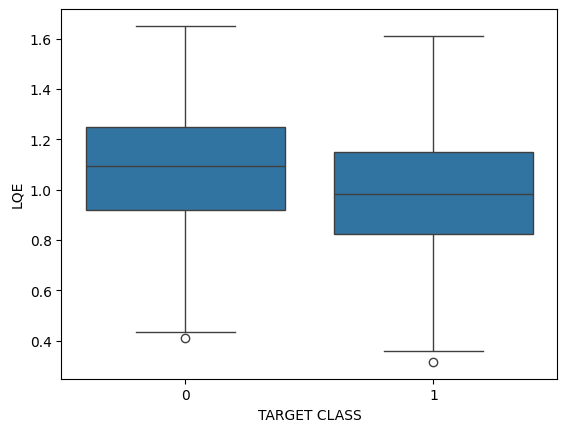

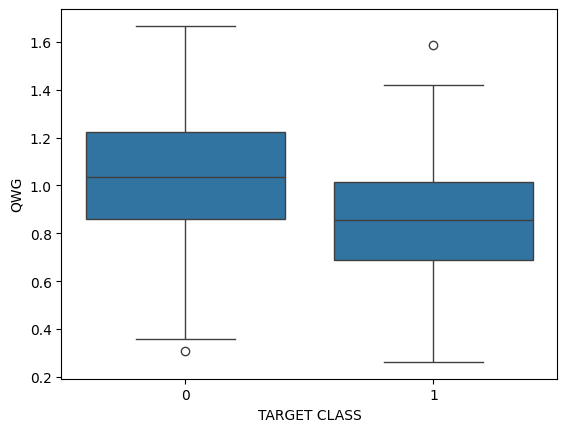

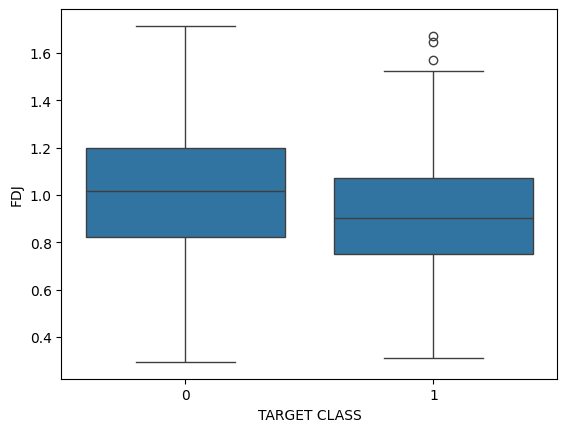

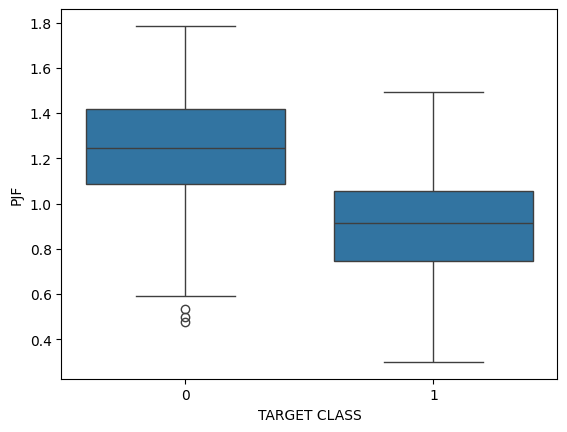

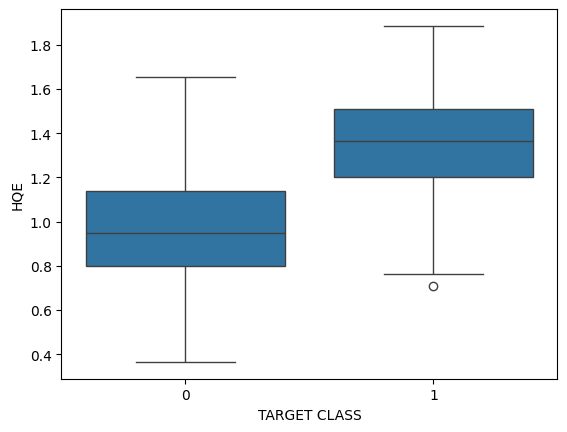

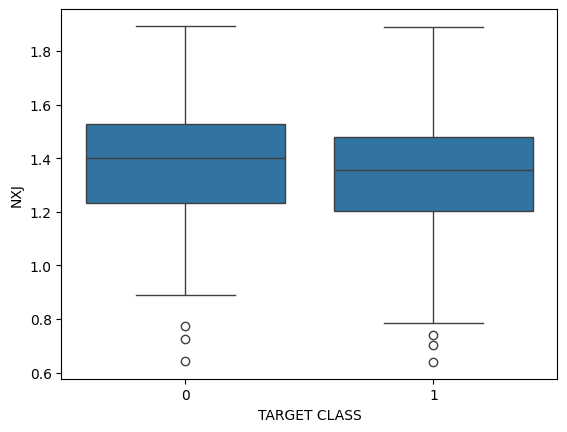

In [49]:
#doing this using a loop

features= df.drop('TARGET CLASS',axis=1).columns

for feature in features:
  sb.boxplot(x=df['TARGET CLASS'],y=df[feature])
  plt.show()

### Question: What conclusion, if any can you draw from these boxplots?🤔
List them down below.

*by looking at the boxplots corresponding to every column;*
1. wtt - target class has higher wtt
2. pti - target class has lower pti
3. eqw - target class has lower eqw
4. sbi - target class has the same sbi -- this doesn't matter? but the range is different
5. lqe - target class has lower lqe
6. qwg - target class has lower qwg
7. fdj - target class has lower fdj
8. pjf - target class has lower pjf
9. hqe - target class has higher hqe
10. nxj - target class has higher nxj

### Standardize the features using sklearn.preprocessing



##### import StandardScaler from Sklearn and instantiate it to a variable called "scaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##### Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform


In [56]:
z = df.drop('TARGET CLASS',axis=1)
z.shape

(1000, 10)

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [57]:
z_scaled = scaler.fit_transform(z)
df_feat = pd.DataFrame(z_scaled, columns=z.columns)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train/Test split

### Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.
Hint: y can be taken directly from the initial dataframe "df"

In [58]:
X = df_feat
y = df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [59]:
#function already imported during regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [61]:
pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       161
           1       0.90      0.93      0.91       139

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [63]:
accuracy = np.round(np.mean(pred == y_test),3)
print(accuracy)

0.92


##### Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [64]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,X_train,y_train,cv=10)
  accuracy_rate.append(score.mean())

##### **Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy Rate')

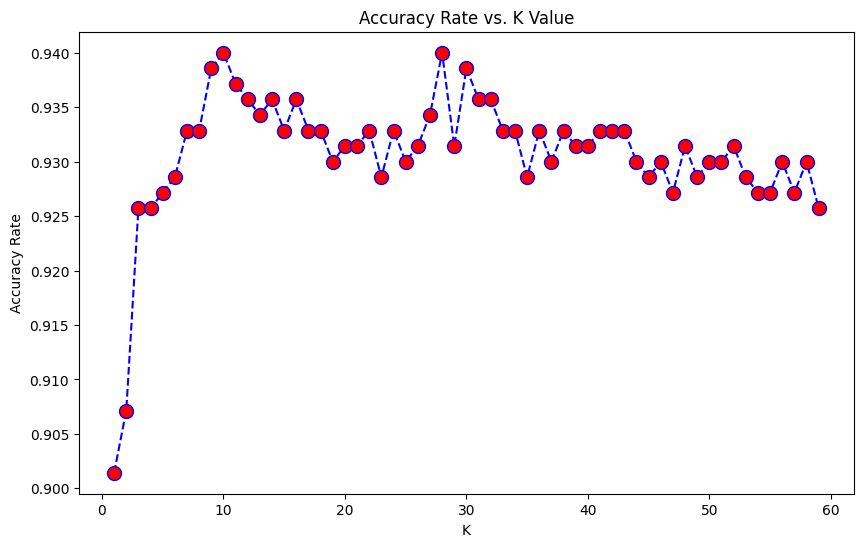

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

##### **Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [73]:
knn = KNeighborsClassifier(n_neighbors=10) #but it looks high at 28 too?
# maybe 10 cause after that it continues increasing but after 28 it decreases
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       161
           1       0.93      0.96      0.94       139

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [74]:
accuracy = np.round(np.mean(pred == y_test),3)
print(accuracy)

0.947


RESEARCH TASK:


### Study Logistic Regression, using the following resources:
https://www.datacamp.com/tutorial/understanding-logistic-regression-python

https://www.ibm.com/think/topics/logistic-regression#:~:text=In%20logistic%20regression%2C%20the%20model,value%20between%200%20and%201.

https://medium.com/@abhishekjainindore24/all-about-logistic-regression-bd135b6e3993






### Now implement logistic regression for the same insurance dataset we used for linear regression, and explain how it works

In [68]:
df = pd.read_csv('/content/drive/MyDrive/synapse/task2/insurance.csv')

In [69]:
df.head() #lets try to predict if the person is a smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
#label encoding
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [84]:
#scale
from sklearn.preprocessing import MinMaxScaler
df[['age','bmi','children','charges']] = MinMaxScaler().fit_transform(df[['age','bmi','children','charges']])

In [85]:
X= df.drop('smoker',axis=1)
y= df['smoker']

In [86]:
#split x and y into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #used the same parameters as the website

In [88]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() #do i have to use random_state again?
logreg.fit(X_train,y_train) #this didnt work unless i scaled it**
y_pred = logreg.predict(X_test)

In [89]:
target_names = ['non-smoker','smoker']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

  non-smoker       0.89      0.97      0.93       273
      smoker       0.78      0.50      0.61        62

    accuracy                           0.88       335
   macro avg       0.83      0.73      0.77       335
weighted avg       0.87      0.88      0.87       335



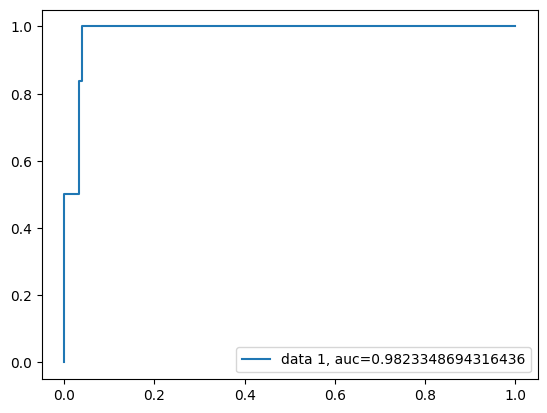

In [92]:
#roc curve
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


*the auc score is quite close to 1, so the model is an accurate classifier*

# ALL THE BEST!!!

End of Task

©DJS Synapse 2025 - 2026